## Step 1: Creating the DataFrame

In [368]:
import pandas as pd

#1 has lots of punctuation {}-+,.
#2 has nothing in particular
#3 has lots of CAPITAL letters
data = {
    'text': [
        """OldChunkCoal has asked me to write six paragraphs anywhere from 2 to 4 sentences long. Who does he think he is? He's asking me to write a full six paragraph essay that changes subject every paragraph. Crazy.""",
        """I used to have a YouTube channel back in 2011. Back then you could customize the color and background of your channel page. My channel was all about Minecraft adventure maps. The main color was black with red highlights and the background was the Minecraft sand texture.""",
        """I recently read a book called "How to Stop Time" by Matt Haig. I recommend it. It is about a man who ages approximately 15 times slower then normal. He was born in the 1500's and lives over 900 years. The story heavily focuses on grief as someone who lives longer than everyone they will ever know has to deal with a lot of death.""",
        """Have you ever baked bread before? It's pretty easy. At the very least, all you need is flour, water, yeast, and a few hours.""",
        """AI is awesome and scary. It has the potential to help us create amazing new things, but I worry about the damage it may allow some to do. There is also the sci-fi horror of a rouge AI.""",
        """Loki is a Disney+ tv show about a variant of the Marvel character Loki. In season 1 he is kidnapped by agents of the Time Variance Authority who make it their responsibility to maintain the Sacred Timeline and to stop any variants from damaging the multiverse. It's a fun show. Highly recommend it.""",
        """The majestic blahaj is a crucial implement in any aspiring femboy’s arsenal. Naysayers may claim that “it’s just a plushie” or that “it doesn’t actually have feelings, it’s not real”. However, this has been proven decidedly false by leading researchers at Sigma University.""",
        """I love listening to the “basic American” accent, it’s like music to my ears. One time in an airport, while I was waiting in line for immigration control, two American guys were having a very loud conversation. I just got to bask in their mundane discussion about someone’s aunt. 10/10 experience""",
        """Did you know that one third of all food produced is actually wasted? This statistic is a bit more complicated than it seems though, since a lot of this food waste happens during the manufacturing process. But still, retail and end-user waste is a very significant contributing factor.""",
        """I fucking hate the Jordan Peterson lobster thing. I stay up at night thinking about it, clutching my fists, sweating, trying not to scream out “THEY’RE INVERTEBRATES” at the top of my lungs at 1 am. It’s haunting me.""",
        """I haven’t been getting much sleep recently. Yesterday I only got 4 hours of sleep, and today I got about 6. Not the worst result, but I am looking forward to finally laying down and getting some good quality shuteye tonight. As long as I don’t remember the fucking lobsters.""",
        """One example of cannibalism becoming a vector for the spread of disease is the history of the Fore people of Papua New Guinea. There, the consumption of human meat (spurred by the cultural practice of endocannibalism) caused a surge of Kuru, which is a type of Transmissible Spongiform Encephalopathy. This practice led to an epidemic which killed 2,700 people, and is likely to have been caused by a single affected individual in the 1900s.""",
        """This oldchunkcoal geezer asked me to write some paragraphs about some waffle. I used to play corejourney with him. He dies a lot on the server but I'd help him every time he died! He was on my team called Hobbits along with nootbot.""",
        """I love playing video games because i can connect with my friends and have fun! I enjoy playing minecraft, factorio, (rule 15)  and valorant!""",
        """I am currently studying my ass off for my final exams! It can be really stressful at times but i don't care. """,
        """pint of stella with lads its comin home, just beaten the wife for not making bangers and mash and she made some vegetables and tried to make me brush me teef i aint putting no white stuff in my mouth""",
        """Yes it’s very interesting, I despise people chewing gum in public, it’s illegal in Singapore. Soon we will be able to use ai to catch people breaking the law and ticket them for such things. It’s just a ticket, but when people chew gum it leads to other things like marijuana and eventually worse drugs, we have to catch them early, before it is too late!""",
        """copying other members announcements is NOT tolerated in this safe and loving environment, therefore I will have to remove your post from the channel as ‘plagiarism’ is a ‘dick move’""",
    ],
    'author': [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
}

# Author1 is dark
# Author2 is Posado
# Author3 is max

df = pd.DataFrame(data)

## Step 2: Adding Features to the DataFrame

In [369]:
import string
import nltk
from nltk.corpus import words
nltk.download('words')
modal_verbs = ['can', 'could', 'may', 'might', 'shall', 'should', 'will', 'would', 'must']


# Function to count punctuation
def count_punctuation(text):
    count = 0
    for char in text:
        if char in string.punctuation:
            count += 1
    return count

# Function to count capital letters
def count_capitals(text):
    count = 0
    for char in text:
        if char.isupper():
            count += 1
    return count

# Function to count 4 letter words
def count_four_letter_words(text):
    # Split the text into words
    words = text.split()
    # Count the words with exactly four letters
    four_letter_words_count = sum(len(word) == 4 for word in words)
    return four_letter_words_count

word_list = set(words.words())
def percentage_dictionary_words(text):
    words_in_text = text.split()  # Split the text into individual words
    number_of_words = len(words_in_text)  # Count the total number of words
    
    # Initialize a counter for dictionary words
    number_of_dictionary_words = 0
    
    # Iterate through each word in the text
    for word in words_in_text:
        # Remove punctuation and convert to lowercase
        cleaned_word = word.lower().strip(string.punctuation)
        # Check if the cleaned word is in the dictionary
        if cleaned_word in word_list:
            # If it is, increment the counter
            number_of_dictionary_words += 1
    
    # Calculate the percentage of dictionary words
    percentage = (number_of_dictionary_words / number_of_words) * 100 if number_of_words > 0 else 0
    return percentage

def count_modals_explicit(text):
    # Normalize the text to lowercase and split into words
    words = text.lower().split()
    # Initialize a counter for modal verbs
    modal_count = 0
    # Iterate over each word in the text
    for word in words:
        # Check if the word is in the list of modal verbs
        if word in modal_verbs:
            # Increment the counter if it is a modal verb
            modal_count += 1
    # Return the total count of modal verbs found in the text
    return modal_count



# Apply functions to the 'text' column to create new columns for each feature
df['punctuation_count'] = df['text'].apply(count_punctuation)
df['capital_count'] = df['text'].apply(count_capitals)
df['four_letter_word_count'] = df['text'].apply(count_four_letter_words)
df['perc_dictionary_words'] = df['text'].apply(percentage_dictionary_words)
df['modal_count'] = df['text'].apply(count_modals_explicit)


[nltk_data] Downloading package words to
[nltk_data]     /Users/donaldlair/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Step 3: Converting DataFrame to NumPy Arrays

In [422]:
import numpy as np

# Converting features and target variable to NumPy arrays
X = df[['punctuation_count', 'capital_count', 'four_letter_word_count', 'perc_dictionary_words', 'modal_count']].to_numpy()  # Feature matrix
y = df['author'].to_numpy()  # Target variable

## EXTRA: Clustering Unsupervised Learning for insights

In [423]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Assuming X is your feature matrix from the DataFrame
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Choose the number of clusters
# kmeans = KMeans(n_clusters=3, random_state=0)  # You might want to experiment with the number of clusters
# clusters = kmeans.fit_predict(X_scaled)

# # Add cluster information back to the DataFrame
# df['cluster'] = clusters

# # Now you can analyze the clusters
# for i in range(3):
#     cluster_data = df[df['cluster'] == i]
#     print(f"Cluster {i}:")
#     print(cluster_data.mean())  # Print the mean of features for each cluster

## EXTRA: Test for overall accuracy depending on Test_Size

In [424]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# test_sizes = [0.2, 0.3, 0.4]
# for test_size in test_sizes:
#     accuracies = []  # To store accuracy of each run
#     for _ in range(20):  # Number of runs for averaging
#         # Splitting the data
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
#         # Scaling
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_test_scaled = scaler.transform(X_test)
        
#         # Training the KNN model
#         knn = KNeighborsClassifier(n_neighbors=3)
#         knn.fit(X_train_scaled, y_train)
        
#         # Making predictions and evaluating
#         y_pred = knn.predict(X_test_scaled)
#         accuracy = accuracy_score(y_test, y_pred)
#         accuracies.append(accuracy)
    
#     # Averaging the accuracies
#     avg_accuracy = np.mean(accuracies)
#     print(f"Average accuracy for test size {test_size}: {avg_accuracy:.2f}")


## Step 4: Splitting the Data & Scaling X

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# First, split your dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Then, initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set features with the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with an example of k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy}")


KNN Model Accuracy: 0.25


/Users/donaldlair/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 6. Run Single Test (Optional Fun)

In [425]:
new_text = "hello singaporean police? I would like to file a report of a citizen of your country breaking the law. Which law? The sale of chewing gum law. Yes thats right. His name is noobbot and he big name on corejoubery, he once killed me so i think tat he should get big sentence. He is big gum kingpin and class A drug smuggler please take this claim seriously Your favourite britianer"
# Assuming the count_punctuation and count_capitals functions are already defined

new_punctuation_count = count_punctuation(new_text)
new_capital_count = count_capitals(new_text)
new_four_letter_word_count = count_four_letter_words(new_text)
new_perc_dictionary_words = percentage_dictionary_words(new_text)
new_modal_count = count_modals_explicit(new_text)

# Option 2: Using NumPy (if you prefer working with arrays)
import numpy as np
new_features = np.array([[new_punctuation_count, new_capital_count, new_four_letter_word_count, new_perc_dictionary_words, new_modal_count]])

new_features_scaled = scaler.transform(new_features)  # This line is necessary to scale the new features
predicted_author_style = knn.predict(new_features_scaled)  # Make sure to use the scaled features here

print(f"The predicted author style is: {predicted_author_style[0]}")

# print(new_punctuation_count)
# print(new_capital_count)
# print(new_four_letter_word_count)
# print(new_perc_dictionary_words)
# print(new_modal_count)


The predicted author style is: 1


/Users/donaldlair/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 7. 3d Plot

[1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3]
[3 1 1 2 3 2 1 3 2 3 2 1 2 3]
[1 1 2 3]
[3 1 1 2 3 2 1 3 2 3 2 1 2 3]
1
(array([ 1,  2,  6, 11]),)
[3 1 1 2 3 2 1 3 2 3 2 1 2 3]
2
(array([ 3,  5,  8, 10, 12]),)
[3 1 1 2 3 2 1 3 2 3 2 1 2 3]
3
(array([ 0,  4,  7,  9, 13]),)


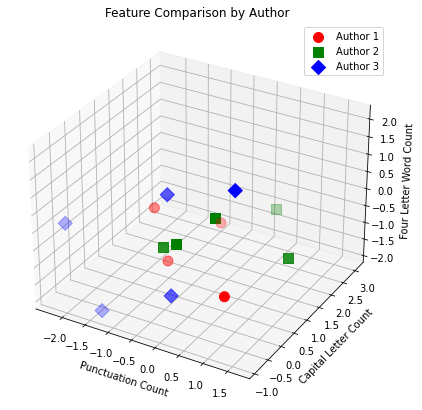

In [375]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Different markers for different authors
markers = ['o', 's', 'D']
# Different colors for different authors
colors = ['red', 'green', 'blue']

print(y)
print(y_train)
print(y_test)

# Plot each author's data points in the 3D space
for i, author in enumerate(np.unique(y_train)):
    idx = np.where(y_train == author)
    print(y_train)
    print(author)
    print(idx)
    ax.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], X_train_scaled[idx, 2], label=f'Author {author}', 
               marker=markers[i], color=colors[i], s=100)
    

# Set labels for the axes
ax.set_xlabel('Punctuation Count')
ax.set_ylabel('Capital Letter Count')
ax.set_zlabel('Four Letter Word Count')

# Title and legend
plt.title('Feature Comparison by Author')
plt.legend()

# Show the plot
plt.show()


## Extra: 4d Plot

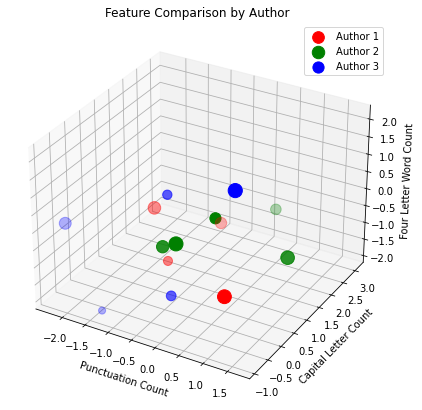

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame and it has been split into training and testing sets

# Normalizing size based on 'perc_dictionary_words' or another feature for the 4th dimension
size_feature = df['perc_dictionary_words'].values  # Ensure this line is before splitting if not already
size_norm = np.interp(size_feature, (size_feature.min(), size_feature.max()), (50, 200))

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

base_colors = ['red', 'green', 'blue']

for i, author in enumerate(np.unique(y_train)):
    idx = np.where(y_train == author)[0]  # Ensuring idx is an array of indices
    ax.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], X_train_scaled[idx, 2],
               label=f'Author {author}', s=size_norm[idx], color=base_colors[i % len(base_colors)])

ax.set_xlabel('Punctuation Count')
ax.set_ylabel('Capital Letter Count')
ax.set_zlabel('Four Letter Word Count')
plt.title('Feature Comparison by Author')
plt.legend()
plt.show()


## 5d Plot

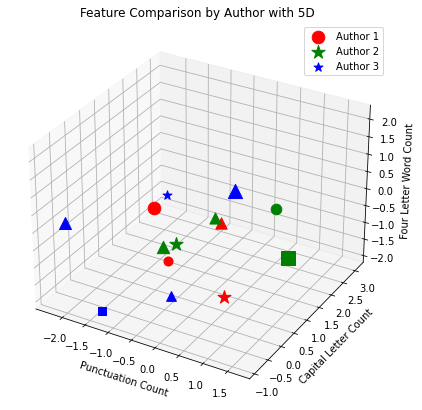

In [377]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dummy feature for demonstration purposes
# Assuming `new_feature_scaled` is a scaled version of your new feature, normalized between 0 and 1
# For example, it could be another feature from your dataframe like "modal verb frequency" normalized
new_feature_scaled = np.random.rand(len(X_train_scaled))

# Define marker styles for different ranges of the new feature
# You might need to adjust the thresholds and markers according to your specific feature
markers = ['o', '^', 's', '*', '+']

# Function to choose marker based on the value of the new feature
def choose_marker(value):
    thresholds = [0.2, 0.4, 0.6, 0.8]
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return markers[i]
    return markers[-1]

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

base_colors = ['red', 'green', 'blue']

for i, author in enumerate(np.unique(y_train)):
    idx = np.where(y_train == author)[0]
    marker_styles = [choose_marker(value) for value in new_feature_scaled[idx]]
    for j, index in enumerate(idx):
        ax.scatter(X_train_scaled[index, 0], X_train_scaled[index, 1], X_train_scaled[index, 2],
                   label=f'Author {author}' if j == 0 else "",  # Avoid duplicate labels
                   s=size_norm[index], color=base_colors[i % len(base_colors)],
                   marker=marker_styles[j])

ax.set_xlabel('Punctuation Count')
ax.set_ylabel('Capital Letter Count')
ax.set_zlabel('Four Letter Word Count')
plt.title('Feature Comparison by Author with 5D')
plt.legend()
plt.show()
